In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Adult/data/"

In [0]:
%tensorflow_version 1.4

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
# Load libraries
import os
import pandas as pd
import numpy as np
from sklearn import metrics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import tree
from numpy import linalg as LA

from sklearn.model_selection import train_test_split

# Load dataset

#url = "./data/"
#df = pd.read_csv(url)


    
filename = os.path.join(path,"adult.csv")    
df = pd.read_csv(filename)



In [0]:
col_names = df.columns
for c in col_names:
    df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [0]:
df.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['divorced','married','married','married',
              'not married','not married','not married'], inplace = True)
#df.head(10)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = preprocessing.LabelEncoder()
category_col =['workclass', 'race','marital-status', 'gender', 'income'] 

for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])


In [0]:
category_col_1 =['workclass', 'education', 'occupation',
               'relationship','native-country'] 

df_2 = pd.get_dummies(df, columns=category_col_1, drop_first=True)

In [0]:
dataframe=df_2.drop('fnlwgt',1)
dataframe =dataframe[[c for c in dataframe if c not in ['income']] + ['income']]
#dataframe.head(20)

In [0]:
## making a copy of the data frame
dataframe.to_csv('adult_kearsNN.csv',index=False)

In [0]:
X = dataframe.iloc[:, 0:88].values
Y = dataframe.iloc[:, 88].values



from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#X_train = X_train.T
#X_test = X_test.T

Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(39073, 88)
(9769, 88)
(39073, 1)
(9769, 1)


In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models,layers
from keras import applications
import glob2 as glob
from numpy import random

In [0]:
# dimensionality of the latents space 
embedding_dim = 32 

#Input layer
input_img = layers.Input(shape=(88,))  

#Encoding layer
encoded = layers.Dense(embedding_dim, activation='relu')(input_img)

#Decoding layer
decoded = layers.Dense(88,activation='relu')(encoded) 

#Autoencoder --> in this API Model, we define the Input tensor and the output layer
#wraps the 2 layers of Encoder e Decoder
autoencoder = models.Model(input_img,decoded)
autoencoder.summary()

#Encoder
encoder = models.Model(input_img,encoded)
encoder.summary()

#Decoder
encoded_input = layers.Input(shape=(embedding_dim,))
decoder_layers = autoencoder.layers[-1]  #applying the last layer
decoder = models.Model(encoded_input,decoder_layers(encoded_input))

print(input_img)
print(encoded)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 88)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2848      
_________________________________________________________________
dense_4 (Dense)              (None, 88)                2904      
Total params: 5,752
Trainable params: 5,752
Non-trainable params: 0
_________________________________________________________________
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 88)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2848      
Total params: 2,848
Trainable params: 2,

In [0]:
autoencoder.compile(
    optimizer='adadelta',  #backpropagation Gradient Descent
    loss='binary_crossentropy'
)

In [0]:
from keras.datasets import mnist
import numpy as np


In [0]:
history = autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,
                validation_data=(X_test,X_test))

Train on 39073 samples, validate on 9769 samples
Epoch 1/50
39073/39073 [==============================] - 1s 17us/step - loss: -0.2950 - val_loss: -0.6298
Epoch 2/50
39073/39073 [==============================] - 1s 13us/step - loss: -0.7953 - val_loss: -0.9148
Epoch 3/50
39073/39073 [==============================] - 1s 14us/step - loss: -1.0606 - val_loss: -1.1411
Epoch 4/50
39073/39073 [==============================] - 1s 14us/step - loss: -1.2416 - val_loss: -1.3376
Epoch 5/50
39073/39073 [==============================] - 1s 13us/step - loss: -1.4466 - val_loss: -1.5224
Epoch 6/50
39073/39073 [==============================] - 1s 14us/step - loss: -1.5997 - val_loss: -1.6376
Epoch 7/50
39073/39073 [==============================] - 1s 13us/step - loss: -1.7065 - val_loss: -1.7507
Epoch 8/50
39073/39073 [==============================] - 1s 13us/step - loss: -1.8214 - val_loss: -1.8640
Epoch 9/50
39073/39073 [==============================] - 1s 13us/step - loss: -1.9270 - val_lo

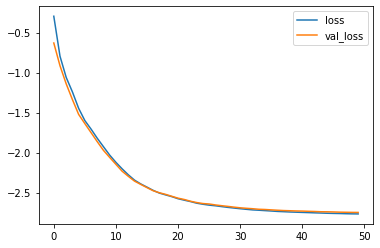

In [0]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.close()

In [0]:
encoded_imgs = encoder.predict(X_test) 
decoded_imgs = decoder.predict(encoded_imgs)  
print(encoded_imgs.shape,decoded_imgs.shape)

(9769, 32) (9769, 88)


In [0]:
print(decoded_imgs[5])

[0.         2.0205886  0.         0.         0.43556616 0.
 0.         0.8090753  0.         0.         0.         0.
 2.2127063  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.3954124
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.7605746  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.26771814 0.         0.        ]


In [0]:
print(X_test[5])

[-0.33881125  1.13748937 -0.37453794 -1.97454973  0.70245636 -0.14432673
  4.49199132  0.61167571 -0.26184148 -0.01517864 -1.72960143 -0.19126963
  3.38695042 -0.20562149 -0.02024    -0.19631672 -0.1160243  -0.07154791
 -0.10157268 -0.14225345 -0.125514   -0.18269245 -0.20971158  2.25335684
 -0.1102225  -0.69163424 -0.24047493 -0.0401867  -0.13138162 -0.53547658
 -0.01824339 -0.38131236 -0.37640961 -0.17853728 -0.20977807 -0.25428213
 -0.33450275 -0.0704556   2.10902636 -0.14346593 -0.35444857 -0.17577106
 -0.22695458 -0.58683722 -0.17868986 -0.42940565 -0.34043089 -0.22463841
 -0.06228607 -0.04910759 -0.04082064 -0.05289096 -0.04641609 -0.03078706
 -0.05619515 -0.05115986 -0.02771973 -0.0631089  -0.03280347 -0.03986597
 -0.03855655 -0.00505903 -0.02086318 -0.02530292 -0.0189323  -0.05642385
 -0.03579519 -0.02771973 -0.04557795 -0.04884505 -0.04385403 -0.02205688
 -0.14074797 -0.031609   -0.02318932 -0.03201209 -0.07778673 -0.04175364
 -0.03615183 -0.06039436 -0.02263017 -0.05039995 -0

In [0]:
print(Y_test[5])
print(Y_test[6])

[1]
[0]


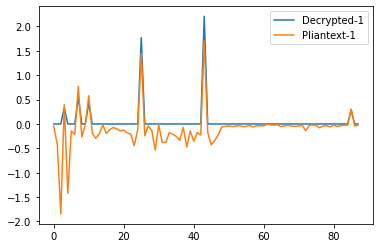

In [0]:
plt.plot(decoded_imgs[11],label='Synthetic-1')
plt.plot(X_test[11],label='Real-1')
filename = os.path.join(path,"compare1.png") 
plt.legend()   
plt.savefig(filename)
plt.show()
plt.close()

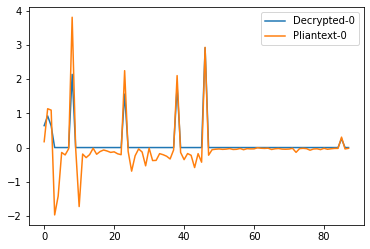

In [0]:
plt.plot(decoded_imgs[6],label='Synthetic-0')
plt.plot(X_test[6],label='Real-0')
filename = os.path.join(path,"compare0.png") 
plt.legend()   
plt.savefig(filename)
plt.show()
plt.close()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [0]:

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [0]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters     

In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [0]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [0]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db



In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db



In [0]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads



In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    sigma = 0.1

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    
    return parameters



# This is a modification of L model forward function I design for my scheme


In [0]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
      
    # Forward propagation  
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [0]:
def compute_accuracy(AL, Y):
    m = AL.shape[1]
    #n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
      
    # Forward propagation  
    #probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    accuracy = np.sum((p == Y)/m)
    
    accuracy = np.squeeze(accuracy)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(accuracy.shape == ())
    
        
    return accuracy

In [0]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

In [0]:
### CONSTANTS ###
layers_dims = [88, 20, 10, 7, 1] #  4-layer model

In [0]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    filename = os.path.join(path,"noised.png") 
    plt.savefig(filename)
    plt.show()
    
    return parameters

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(39073, 88)
(9769, 88)
(39073, 1)
(9769, 1)


In [0]:
X_train = X_train.T
X_test = X_test.T

Y_train = np.reshape(Y_train,(1,Y_train.shape[0]))
Y_test = np.reshape(Y_test,(1,Y_test.shape[0]))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(88, 39073)
(88, 9769)
(1, 39073)
(1, 9769)


In [0]:
parameters = L_layer_model(X_train, Y_train, layers_dims, learning_rate= 0.09, num_iterations = 3000, print_cost = True)

Cost after iteration 0: 0.716555
Cost after iteration 100: 0.505791
Cost after iteration 200: 0.406006
Cost after iteration 300: 0.364134
Cost after iteration 400: 0.346922
Cost after iteration 500: 0.336441
Cost after iteration 600: 0.328713
Cost after iteration 700: 0.323038
Cost after iteration 800: 0.318584
Cost after iteration 900: 0.315118
Cost after iteration 1000: 0.312545
Cost after iteration 1100: 0.310519
Cost after iteration 1200: 0.308930
Cost after iteration 1300: 0.307662


In [0]:
print(decoded_imgs.shape)
decoded_imgs = decoded_imgs.T
print(decoded_imgs.shape)

In [0]:
pred_train = predict(decoded_imgs, Y_test, parameters)